In [2]:
# First, we install actual versions of TF and Keras
!pip install --upgrade -q tensorflow
!pip install -q keras

Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda32021\Scripts\pip-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Lenovo\anaconda32021\lib\site-packages\pip\_internal\cli\main.py", line 71, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "C:\Users\Lenovo\anaconda32021\lib\site-packages\pip\_internal\commands\__init__.py", line 96, in create_command
    module = importlib.import_module(module_path)
  File "C:\Users\Lenovo\anaconda32021\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  Fi

In [1]:
# Importing necessary libs
import pandas as pd
import numpy as np
import hashlib
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras import models, layers, callbacks, metrics
from keras.utils import np_utils


from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [2]:
# Let's read our data and take a look at it
# We have 84 features with mixed dtypes and the Class target variable
data = pd.read_csv('Keylogger_Detection.csv').drop(columns=['Unnamed: 0'])
len_data = len(data)
data

C:\Users\Lenovo\anaconda32021\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,56) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Flow ID      Source IP   Source Port  \
0           10.42.0.211-52.6.25.230-34451-443-6    10.42.0.211       34451.0   
1          172.217.3.99-10.42.0.151-443-53892-6    10.42.0.151       53892.0   
2          172.217.3.98-10.42.0.151-443-50750-6   172.217.3.98         443.0   
3             10.42.0.211-10.42.0.1-23025-53-17    10.42.0.211       23025.0   
4       10.42.0.211-123.129.244.226-52602-443-6    10.42.0.211       52602.0   
...                                         ...            ...           ...   
523612     10.42.0.151-106.39.169.66-52373-80-6    10.42.0.151       52373.0   
523613         10.42.0.211-10.42.0.1-2522-53-17    10.42.0.211        2522.0   
523614    220.243.219.55-10.42.0.211-80-60995-6    10.42.0.211       60995.0   
523615   172.217.12.138-10.42.0.211-443-52724-6    10.42.0.211       52724.0   
523616    10.42.0.211-119.146.74.33-47669-443-6  119.146.74.33         443.0   

         Destination IP   Destination Port   Protocol            Timestamp  \
0           52.6.25.230              443.0        6.0  04/08/2017 05:12:36   
1          172.217.3.99              443.0        6.0  04/08/2017 07:55:51   
2           10.42.0.151            50750.0        6.0  04/08/2017 08:48:19   
3             10.42.0.1               53.0       17.0  04/08/2017 05:54:10   
4       123.129.244.226              443.0        6.0  04/08/2017 08:44:25   
...                 ...                ...        ...                  ...   
523612    106.39.169.66               80.0        6.0  30/06/2017 01:22:05   
523613        10.42.0.1               53.0       17.0  04/08/2017 12:40:03   
523614   220.243.219.55               80.0        6.0  04/08/2017 09:39:08   
523615   172.217.12.138              443.0        6.0  04/08/2017 01:41:22   
523616      10.42.0.211            47669.0        6.0  11/07/2017 10:14:50   

         Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0           12140931.0                 9.0                      6.0  ...   
1             418882.0               102.0                    203.0  ...   
2                 45.0                 2.0                      0.0  ...   
3             541699.0                 1.0                      1.0  ...   
4            7310795.0                 3.0                      0.0  ...   
...                ...                 ...                      ...  ...   
523612        589453.0                 5.0                      3.0  ...   
523613        216310.0                 1.0                      1.0  ...   
523614       5215688.0                 2.0                      0.0  ...   
523615        223370.0                16.0                     11.0  ...   
523616      46579450.0                 1.0                      2.0  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
0                        32.0          0.0          0.0          0.0   
1                        32.0          0.0          0.0          0.0   
2                        32.0          0.0          0.0          0.0   
3                        32.0          0.0          0.0          0.0   
4                        20.0          0.0          0.0          0.0   
...                       ...          ...          ...          ...   
523612                   20.0          0.0          0.0          0.0   
523613                   32.0          0.0          0.0          0.0   
523614                   20.0          0.0          0.0          0.0   
523615                   32.0          0.0          0.0          0.0   
523616                   20.0          0.0          0.0          0.0   

         Active Min  Idle Mean   Idle Std   Idle Max   Idle Min      Class  
0               0.0        0.0        0.0        0.0        0.0     Benign  
1               0.0        0.0        0.0        0.0        0.0     Benign  
2               0.0        0.0        0.0        0.0        0.0     Benign  
3               0.0        0.0        0.0        0.0    

In [3]:
# Let's check our data for missing values and fill NAs with mode if missing values exist
for col in data.drop(columns=['Class']).columns:
  if data[col].isna().any():
    print(f"Column {col} contains missing values")
    data[col] = data[col].fillna(data[col].mode().iloc[0])

Column Flow ID contains missing values
Column  Flow IAT Mean contains missing values
Column  Flow IAT Std contains missing values
Column  Flow IAT Max contains missing values
Column  Flow IAT Min contains missing values
Column Fwd IAT Total contains missing values
Column  Fwd IAT Mean contains missing values
Column  Fwd IAT Std contains missing values
Column  Fwd IAT Max contains missing values
Column  Fwd IAT Min contains missing values
Column Bwd IAT Total contains missing values
Column  Bwd IAT Mean contains missing values
Column  Bwd IAT Std contains missing values
Column  Bwd IAT Max contains missing values
Column  Bwd IAT Min contains missing values
Column Fwd PSH Flags contains missing values
Column  Bwd PSH Flags contains missing values
Column  Fwd URG Flags contains missing values
Column  Bwd URG Flags contains missing values
Column  Fwd Header Length contains missing values
Column  Bwd Header Length contains missing values
Column Fwd Packets/s contains missing values
Column  

In [4]:
# We have many columns with Object dtype; let's apply one-hot encoding
# (if the number of unique values is relatively small)
# or hashing if there are many uniques
cols_to_drop = []

for col in data.drop(columns=['Class']).columns:
  if data[col].dtype == 'object':
    print(f'Column {col} has {data[col].nunique()} values among {len_data}')

    if data[col].nunique() < 25:
      print(f'One-hot encoding of {col}')
      one_hot_cols = pd.get_dummies(data[col])
      for ohc in one_hot_cols.columns:
        data[col + '_' + str(ohc)] = one_hot_cols[ohc]
    else:
      print(f'Hashing of {col}')
      data[col + '_hash'] = data[col].apply(lambda row: int(hashlib.sha1((col + "_" + str(row)).encode('utf-8')).hexdigest(), 16) % len_data)

    cols_to_drop.append(col)

Column Flow ID has 91920 values among 523617
Hashing of Flow ID
Column  Source IP has 1815 values among 523617
Hashing of  Source IP
Column  Destination IP has 3189 values among 523617
Hashing of  Destination IP
Column  Timestamp has 40542 values among 523617
Hashing of  Timestamp
Column  Packet Length Std has 39346 values among 523617
Hashing of  Packet Length Std
Column  CWE Flag Count has 4 values among 523617
One-hot encoding of  CWE Flag Count


In [5]:
# Dropping non-hashed versions of columns from previous step
data = data.drop(columns=cols_to_drop)

In [6]:
# The target variable (Class) has 6 unique string values,
# let's represent them with numerical labels
class_nums = {}
i = 0
for cl in data.Class.unique():
    class_nums[cl] = i
    i += 1

data['Class_num'] = [class_nums[cl] for cl in data.Class.values]
data = data.drop(columns=['Class'])
data

Source Port   Destination Port   Protocol   Flow Duration  \
0            34451.0              443.0        6.0      12140931.0   
1            53892.0              443.0        6.0        418882.0   
2              443.0            50750.0        6.0            45.0   
3            23025.0               53.0       17.0        541699.0   
4            52602.0              443.0        6.0       7310795.0   
...              ...                ...        ...             ...   
523612       52373.0               80.0        6.0        589453.0   
523613        2522.0               53.0       17.0        216310.0   
523614       60995.0               80.0        6.0       5215688.0   
523615       52724.0              443.0        6.0        223370.0   
523616         443.0            47669.0        6.0      46579450.0   

         Total Fwd Packets   Total Backward Packets  \
0                      9.0                      6.0   
1                    102.0                    203.0   
2                      2.0                      0.0   
3                      1.0                      1.0   
4                      3.0                      0.0   
...                    ...                      ...   
523612                 5.0                      3.0   
523613                 1.0                      1.0   
523614                 2.0                      0.0   
523615                16.0                     11.0   
523616                 1.0                      2.0   

        Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                             334.0                        3664.0   
1                             829.0                      279509.0   
2                              55.0                           0.0   
3                              39.0                         225.0   
4                               0.0                           0.0   
...                             ...                           ...   
523612                       2924.0                         121.0   
523613                         37.0                          74.0   
523614                          0.0                           0.0   
523615                      11275.0                        1187.0   
523616                          0.0                           0.0   

         Fwd Packet Length Max   Fwd Packet Length Min  ...   Idle Min  \
0                        208.0                     0.0  ...        0.0   
1                        517.0                     0.0  ...        0.0   
2                         55.0                     0.0  ...        0.0   
3                         39.0                    39.0  ...        0.0   
4                          0.0                     0.0  ...        0.0   
...                        ...                     ...  ...        ...   
523612                  1460.0                     0.0  ...        0.0   
523613                    37.0                    37.0  ...        0.0   
523614                     0.0                     0.0  ...        0.0   
523615                  1368.0                     0.0  ...        0.0   
523616                     0.0                     0.0  ...        0.0   

        Flow ID_hash   Source IP_hash   Destination IP_hash   Timestamp_hash  \
0             371382             4753                233965           188586   
1             410694           123846                495601           230960   
2             180866            32038                518422           487211   
3             387785             4753                 84728           102836   
4              32450             4753                366778           508071   
...              ...              ...                   ...              ...   
523612        223006           123846                180742            71664   
523613        354748             4753                 84728           242794   
523614        382024             4753                135571          

In [7]:
# We have quite many features, so there may be highly correlated ones;
# having highly correlated features won't help our model, so let's drop them
# We drop the features that have correlation coefficient between 0.9 and 1
# We don't include 1 as every feature has CC=1 with itself
# Code idea is taken from
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr = data.drop(columns=["Class_num"]).corr()
corr_top = corr.abs().unstack().sort_values(kind='quicksort')
corr_top = corr_top[corr_top > 0.9][corr_top < 1]

cols_to_drop = [corr_top.index[i][0] for i in range(0, len(corr_top), 2)]
print(f"Highly correlated features: {cols_to_drop}")
data = data.drop(columns=cols_to_drop)

data

Highly correlated features: [' Bwd Packet Length Mean', ' Avg Bwd Segment Size', ' Min Packet Length', 'Fwd Packets/s', ' Packet Length Variance', ' Average Packet Size', ' Average Packet Size', 'Fwd IAT Total', ' Fwd Packet Length Max', ' Active Max', ' Flow Duration', ' Idle Min', ' Flow IAT Mean', ' Fwd IAT Min', ' Bwd IAT Max', ' Bwd Packet Length Std', ' Active Min', ' Bwd Packet Length Std', 'Init_Win_bytes_forward', ' Min Packet Length', ' Protocol', ' Idle Max', ' Idle Min', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Max Packet Length', ' Packet Length Mean', ' Bwd Packets/s', ' Bwd PSH Flags', ' Bwd URG Flags', ' Bwd Packets/s', ' Subflow Bwd Bytes', ' Total Length of Bwd Packets', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes', ' Max Packet Length', 'Fwd PSH Flags', 'Fwd PSH Flags', 'Fwd PSH Flags', 'Fwd PSH Flags', ' Protocol', ' Total Fwd Packets', ' Fwd Header Length', ' Fwd Header Length.1', ' Avg Fwd Segment Size', ' Bwd URG Flags', ' Bwd PSH Flags', ' 

Source Port   Destination Port   Fwd Packet Length Min  \
0            34451.0              443.0                     0.0   
1            53892.0              443.0                     0.0   
2              443.0            50750.0                     0.0   
3            23025.0               53.0                    39.0   
4            52602.0              443.0                     0.0   
...              ...                ...                     ...   
523612       52373.0               80.0                     0.0   
523613        2522.0               53.0                    37.0   
523614       60995.0               80.0                     0.0   
523615       52724.0              443.0                     0.0   
523616         443.0            47669.0                     0.0   

         Fwd Packet Length Mean   Fwd Packet Length Std  \
0                     37.111111               76.440245   
1                      8.127451               57.270709   
2                     27.500000               38.890873   
3                     39.000000                0.000000   
4                      0.000000                0.000000   
...                         ...                     ...   
523612               584.800000              798.946306   
523613                37.000000                0.000000   
523614                 0.000000                0.000000   
523615               704.687500              687.150320   
523616                 0.000000                0.000000   

        Bwd Packet Length Max   Bwd Packet Length Min  Flow Bytes/s  \
0                      1448.0                     0.0  3.292993e+02   
1                      1418.0                     0.0  6.692529e+05   
2                         0.0                     0.0  1.222222e+06   
3                       225.0                   225.0  4.873555e+02   
4                         0.0                     0.0  0.000000e+00   
...                       ...                     ...           ...   
523612                  121.0                     0.0  5.165806e+03   
523613                   74.0                    74.0  5.131524e+02   
523614                    0.0                     0.0  0.000000e+00   
523615                  586.0                     0.0  5.579084e+04   
523616                    0.0                     0.0  0.000000e+00   

         Flow Packets/s   Flow IAT Std  ...   Idle Std  Flow ID_hash  \
0              1.235490   3.179603e+06  ...        0.0        371382   
1            728.128685   6.067904e+03  ...        0.0        410694   
2          44444.444444   0.000000e+00  ...        0.0        180866   
3              3.692087   0.000000e+00  ...        0.0        387785   
4              0.410352   5.126208e+06  ...        0.0         32450   
...                 ...            ...  ...        ...           ...   
523612        13.571905   1.251750e+05  ...        0.0        223006   
523613         9.245990   0.000000e+00  ...        0.0        354748   
523614         0.383459   0.000000e+00  ...        0.0        382024   
523615       120.875677   1.436014e+04  ...        0.0        260704   
523616         0.064406   3.288388e+07  ...        0.0        315165   

         Source IP_hash   Destination IP_hash   Timestamp_hash  \
0                  4753                233965           188586   
1                123846                495601           230960   
2                 32038                518422           487211   
3                  4753                 84728           102836   
4                  4753                366778           508071   
...                 ...                   ...              ...   
523612           123846                180742            71664   
523613             4753                 84728           242794   
523614             4753                135571           113606   
523615             4753                234524           506576   
523616           276747                193798      

In [8]:
# Neural network fits better on data with small range, so let's scale it
ss = StandardScaler()
data_scaled = pd.DataFrame(columns=data.drop(columns=['Class_num']).columns,data=ss.fit_transform(data.drop(columns=['Class_num']), data.Class_num))
data_scaled['Class_num'] = data.Class_num
data_scaled

Source Port   Destination Port   Fwd Packet Length Min  \
0          -0.210468          -0.368578               -0.212203   
1           0.828401          -0.368578               -0.212203   
2          -2.027754           2.839532               -0.212203   
3          -0.821039          -0.393449                0.522915   
4           0.759467          -0.368578               -0.212203   
...              ...                ...                     ...   
523612      0.747230          -0.391727               -0.212203   
523613     -1.916658          -0.393449                0.485216   
523614      1.207964          -0.391727               -0.212203   
523615      0.765986          -0.368578               -0.212203   
523616     -2.027754           2.643054               -0.212203   

         Fwd Packet Length Mean   Fwd Packet Length Std  \
0                     -0.182887               -0.018077   
1                     -0.417931               -0.144807   
2                     -0.260828               -0.266317   
3                     -0.167569               -0.523426   
4                     -0.483840               -0.523426   
...                         ...                     ...   
523612                 4.258613                4.758439   
523613                -0.183788               -0.523426   
523614                -0.483840               -0.523426   
523615                 5.230844                4.019352   
523616                -0.483840               -0.523426   

        Bwd Packet Length Max   Bwd Packet Length Min  Flow Bytes/s  \
0                    1.992640               -0.356094     -0.100220   
1                    1.938685               -0.356094      0.606939   
2                   -0.611576               -0.356094      1.191516   
3                   -0.206915                2.998913     -0.100052   
4                   -0.611576               -0.356094     -0.100568   
...                       ...                     ...           ...   
523612              -0.393958               -0.356094     -0.095107   
523613              -0.478487                0.747330     -0.100025   
523614              -0.611576               -0.356094     -0.100568   
523615               0.442340               -0.356094     -0.041588   
523616              -0.611576               -0.356094     -0.100568   

         Flow Packets/s   Flow IAT Std  ...   Idle Std  Flow ID_hash  \
0             -0.140149       0.112635  ...  -0.121634      0.714752   
1             -0.120963      -0.384509  ...  -0.121634      0.974543   
2              1.032915      -0.385460  ...  -0.121634     -0.544263   
3             -0.140084      -0.385460  ...  -0.121634      0.823150   
4             -0.140171       0.417576  ...  -0.121634     -1.525063   
...                 ...            ...  ...        ...           ...   
523612        -0.139823      -0.365851  ...  -0.121634     -0.265783   
523613        -0.139937      -0.385460  ...  -0.121634      0.604827   
523614        -0.140171      -0.385460  ...  -0.121634      0.785079   
523615        -0.136991      -0.383210  ...  -0.121634     -0.016658   
523616        -0.140180       4.765900  ...  -0.121634      0.343245   

         Source IP_hash   Destination IP_hash   Timestamp_hash  \
0             -0.806277             -0.026111        -0.482692   
1             -0.091533              1.649509        -0.204585   
2             -0.642525              1.795664         1.477229   
3             -0.806277             -0.981883        -1.045483   
4             -0.806277              0.824476         1.614136   
...                 ...                   ...              ...   
523612        -0.091533             -0.366972        -1.250069   
523613        -0.806277             -0.981883        -0.126917   
523614        -0.806277             -0.656265        -0.974797   
523615        -0.806277             -0.022531         1.604324   
523616         0.826112             -0.283356      

In [9]:
# Separating the dataset into train, test and validation sets at the ratio of (70%/15%/15%)
X_train, X_test, Y_train, Y_test = train_test_split(data_scaled.drop(columns=['Class_num']), data_scaled.Class_num,
                                                   random_state=42, stratify=data_scaled.Class_num, train_size=0.7)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, random_state=42, stratify=Y_test, train_size=0.5)

In [10]:
# Let's check the target distribution;
# it's easy to notice that the '0' class samples prevail,
# so it's reasonable to assign weigths to classes to compensate
# the imbalance
data_scaled['Class_num'].value_counts()

0    308813
1    214804
Name: Class_num, dtype: int64

In [11]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=Y_train.unique(),
                                                 y=Y_train.values)

In [12]:
# Before fitting, we have to one-hot encode the target vectors as we have multiclass problem
Y_train = np_utils.to_categorical(Y_train, data_scaled.Class_num.nunique())
Y_test = np_utils.to_categorical(Y_test, data_scaled.Class_num.nunique())
Y_val = np_utils.to_categorical(Y_val, data_scaled.Class_num.nunique())

In [13]:
# Let's construct our simple DNN with two hidden layers
clf = models.Sequential()
clf.add(layers.Dense(64, activation='relu', input_dim=data_scaled.shape[1]-1))
clf.add(layers.Dense(64, activation='relu'))
clf.add(layers.Dense(64, activation='relu'))
clf.add(layers.Dense(data_scaled.Class_num.nunique(), activation='sigmoid'))

clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3328      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 11,778
Trainable params: 11,778
Non-trainable params: 0
_________________________________________________________________


In [14]:
# The target metric is CategoricalAccuracy; it's accuracy
# for multiclass data with one-hot encoded labels
clf.compile(optimizer='SGD',
 loss='categorical_crossentropy',
 metrics=[metrics.CategoricalAccuracy()])

In [15]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
keras = tf.keras


# buat panggilan balik penghentian awal
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# Simpan riwayat model menjadi variabel
history = clf.fit(X_train, Y_train, 
                  epochs=100, validation_data=(X_val, Y_val),
                  callbacks=[callbacks.EarlyStopping(monitor='val_categorical_accuracy',
                                   patience=5,
                                   verbose=1,
                                   restore_best_weights=True,
                                   mode='max')])

Epoch 1/100
11455/11455 [==============================] - 11s 939us/step - loss: 0.6422 - categorical_accuracy: 0.6200 - val_loss: 0.6323 - val_categorical_accuracy: 0.6305
Epoch 2/100
11455/11455 [==============================] - 11s 967us/step - loss: 0.6264 - categorical_accuracy: 0.6385 - val_loss: 0.6232 - val_categorical_accuracy: 0.6422
Epoch 3/100
11455/11455 [==============================] - 11s 949us/step - loss: 0.6178 - categorical_accuracy: 0.6480 - val_loss: 0.6169 - val_categorical_accuracy: 0.6489
Epoch 4/100
11455/11455 [==============================] - 14s 1ms/step - loss: 0.6113 - categorical_accuracy: 0.6545 - val_loss: 0.6192 - val_categorical_accuracy: 0.6470
Epoch 5/100
11455/11455 [==============================] - 11s 964us/step - loss: 0.6067 - categorical_accuracy: 0.6591 - val_loss: 0.6130 - val_categorical_accuracy: 0.6529
Epoch 6/100
11455/11455 [==============================] - 11s 926us/step - loss: 0.6030 - categorical_accuracy: 0.6625 - val_loss: 

In [16]:
# Finally evaluating our model on test data
clf.evaluate(X_test, Y_test)

df =pd.DataFrame.from_dict(history.history)
print(df.mean())

2455/2455 [==============================] - 2s 701us/step - loss: 0.5651 - categorical_accuracy: 0.6969
loss                        0.579169
categorical_accuracy        0.681931
val_loss                    0.588644
val_categorical_accuracy    0.674887
dtype: float64


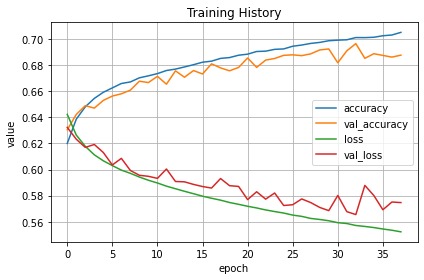

In [17]:
# Plot model training history
def plot_history():
    plt.plot(history.history['categorical_accuracy'],label='accuracy')
    plt.plot(history.history['val_categorical_accuracy'],label='val_accuracy')
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.legend()
    plt.title('Training History')
    plt.xlabel('epoch')
    plt.ylabel('value')
    plt.tight_layout()
    plt.grid(True)
    plt.savefig('keylogger deteksi ANN -sigmoid-SGD.jpg')
    plt.show()

plot_history()

In [42]:
#data.to_csv('file_name.csv', index=False)


In [99]:
data_scaled.to_csv('uji.csv', index=False)

In [104]:
# make class predictions with the model ##
Xnew = loadtxt('Keylogger_Detection_Test1.csv', delimiter=',') #, dtype='str')
#ynew = clf.predict(Xnew)

ynew = clf.predict(Xnew)
ynew = np.round(ynew).astype(int)

for i in range(len(Xnew)):
    print("X=%s, Predicted=%d" % (Xnew[i], ynew[i]))

ValueError: could not convert string to float: ''

In [101]:
# make class predictions with the model ##
Xnew = loadtxt('Keylogger_Detection_Test1.csv', delimiter=',') #, dtype='str')
ynew = clf.predict(Xnew)

for i in range(len(Xnew)):
    print("X=%s, Predicted=%d" % (Xnew[i], ynew[i]))

ValueError: could not convert string to float: ''

In [102]:
Xnew

array([[ 3.44510000e+04,  4.43000000e+02,  0.00000000e+00,
         3.71111111e+01,  7.64402454e+01,  1.44800000e+03,
         0.00000000e+00,  3.29299293e+02,  1.23549010e+00,
         3.17960278e+06,  1.19141640e+07,  1.90000000e+01,
         1.51761638e+06,  4.20092354e+06,  1.19141640e+07,
         1.61697000e+05,  3.23394000e+04,  4.67056244e+04,
         1.90000000e+01,  2.00000000e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  9.00000000e+00,  6.00000000e+00,
         1.19000000e+02,  2.00000000e+00,  3.20000000e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.71382000e+05,  4.75300000e+03,
         2.33965000e+05,  1.88586000e+05,  2.57797000e+05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [103]:
ynew

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [113]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 10,  6],
       [ 0,  0,  9]], dtype=int64)

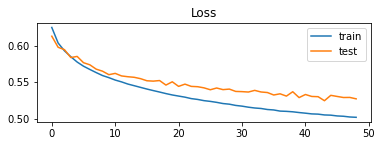

In [121]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

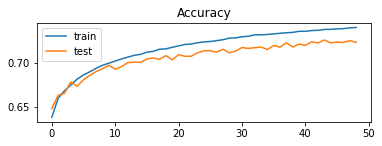

In [119]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

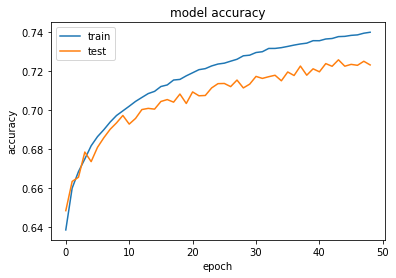

In [123]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


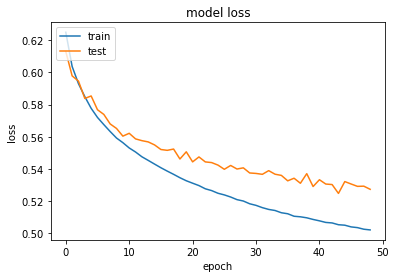

In [124]:
# summarize history for loss
# We can see that the model has comparable performance on both train
# and validation datasets (labeled test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()